In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
#import dataset
import pandas as pd

#train-data : untuk melakukan training 
#test-data : test (80% train, 20% test)
#sample-entry : sample

train_data = pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-training.csv", index_col=0) 
test_data  = pd.read_csv("/kaggle/input/GiveMeSomeCredit/cs-test.csv", index_col=0)
sample_data = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv', index_col=0)

In [3]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
test_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [5]:
sample_data

,Probability
Id,
1,0.080807
2,0.040719
3,0.011968
4,0.067640
5,0.108264
...,...
101499,0.045363
101500,0.343775
101501,0.006970


In [6]:
train_data.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [7]:
test_data.nunique()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines    85716
age                                        82
NumberOfTime30-59DaysPastDueNotWorse       16
DebtRatio                               79878
MonthlyIncome                           11976
NumberOfOpenCreditLinesAndLoans            56
NumberOfTimes90DaysLate                    18
NumberRealEstateLoansOrLines               24
NumberOfTime60-89DaysPastDueNotWorse       12
NumberOfDependents                         13
dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [9]:
test_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [10]:
test_data.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0
101503,NaN,0.441842,29,0,0.198918,5916.0,12,0,0,0,0.0


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [12]:
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
train_data.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [14]:
test_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [15]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [16]:
pd.DataFrame({'jumlah' : train_data.isnull().sum().values, 'ratio dalam %' : train_data.isnull().mean()*100})

,jumlah,ratio dalam %
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29731,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [17]:
pd.DataFrame({'total' : test_data.isnull().sum().values, 'ratio in %' : test_data.isnull().mean()*100})

,total,ratio in %
SeriousDlqin2yrs,101503,100.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,20103,19.805326
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [18]:
# 1 punya tunggakan dan 0 tidak punya
train_data['SeriousDlqin2yrs'].value_counts()/train_data.shape[0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:>

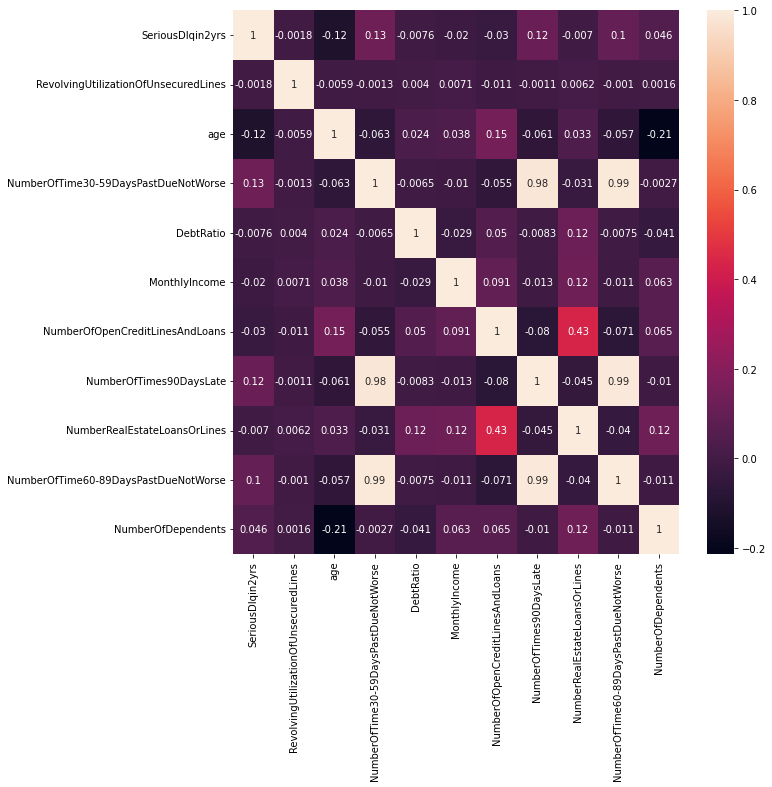

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True)

Text(0, 0.5, 'Total')

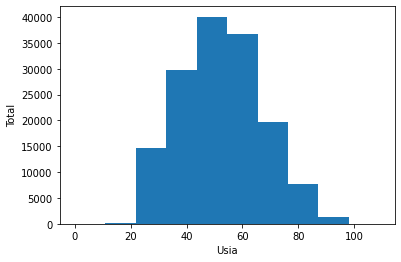

In [20]:
plt.hist(train_data["age"])

plt.xlabel('Usia')
plt.ylabel('Total')

In [21]:
import numpy as np
def remove_outliers(df,attribute_name,max_scale_from_std):
    f = df[attribute_name]
    std = f.std()
    distance_from_mean = f-f.mean()
    condition = np.abs(distance_from_mean) >= max_scale_from_std * std
    df.loc[condition,attribute_name] = f.mean()
    return df

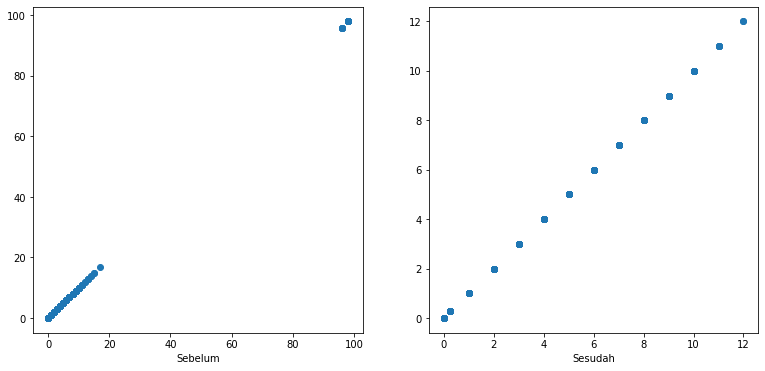

In [22]:
atribut = train_data['NumberOfTimes90DaysLate']

fig, axes = plt.subplots(1, 2, figsize=(13,6))
axes[0].scatter(atribut, atribut)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(train_data, "NumberOfTimes90DaysLate", 3)
atribut = atribut = train_data['NumberOfTimes90DaysLate']
axes[1].scatter(atribut, atribut)
axes[1].set_xlabel("Sesudah")


plt.show()


Text(0.5, 0, 'Sesudah')

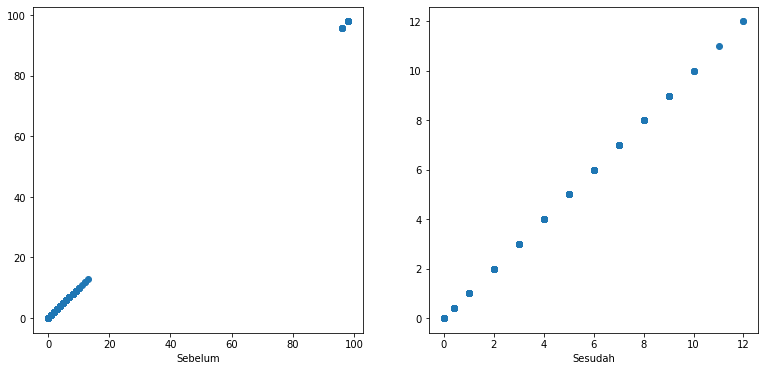

In [23]:
atribut = train_data['NumberOfTime30-59DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13,6))
axes[0].scatter(atribut, atribut)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(train_data, "NumberOfTime30-59DaysPastDueNotWorse", 3)
atribut = atribut = train_data['NumberOfTime30-59DaysPastDueNotWorse']
axes[1].scatter(atribut, atribut)
axes[1].set_xlabel("Sesudah")

Text(0.5, 0, 'Sesudah')

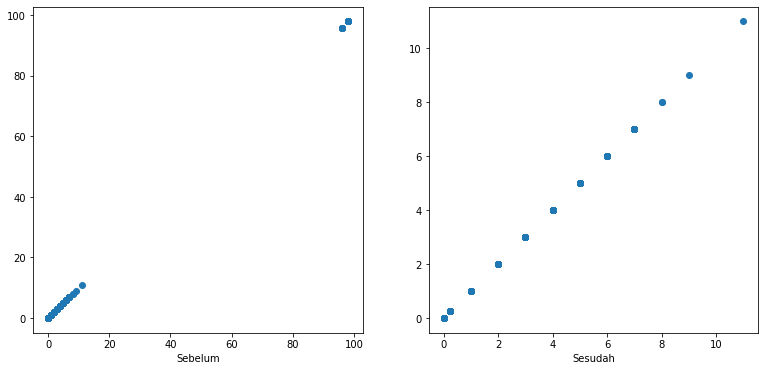

In [24]:
atribut = train_data['NumberOfTime60-89DaysPastDueNotWorse']

fig, axes = plt.subplots(1, 2, figsize=(13,6))
axes[0].scatter(atribut, atribut)
axes[0].set_xlabel("Sebelum")

train_data = remove_outliers(train_data, "NumberOfTime60-89DaysPastDueNotWorse", 3)
atribut = atribut = train_data['NumberOfTime60-89DaysPastDueNotWorse']
axes[1].scatter(atribut, atribut)
axes[1].set_xlabel("Sesudah")

In [25]:
NumberOfDependents_train = train_data['NumberOfDependents']
NumberOfDependents_train_mean = NumberOfDependents_train.mean()
NumberOfDependents_train_modus = NumberOfDependents_train.mode()
NumberOfDependents_train_median = NumberOfDependents_train.median()

MonthlyIncome_train = train_data['MonthlyIncome']
MonthlyIncome_train_mean = MonthlyIncome_train.mean()
MonthlyIncome_train_modus = MonthlyIncome_train.mode()
MonthlyIncome_train_median = MonthlyIncome_train.median()

print("Train Data")
print("NumberOfDependents")
print("NumberOfDependents Mean : ", NumberOfDependents_train_mean)
print("NumberOfDependents Median : ", NumberOfDependents_train_median)
print("NumberOfDependents Modus : ", NumberOfDependents_train_modus)

print("Monthly Income")
print("MonthlyIncome Mean : ", MonthlyIncome_train_mean)
print("MonthlyIncome Median : ", MonthlyIncome_train_median)
print("MonthlyIncome Modus : ", MonthlyIncome_train_modus)

Train Data
NumberOfDependents
NumberOfDependents Mean :  0.7572222678605657
NumberOfDependents Median :  0.0
NumberOfDependents Modus :  0    0.0
dtype: float64
Monthly Income
MonthlyIncome Mean :  6670.221237392844
MonthlyIncome Median :  5400.0
MonthlyIncome Modus :  0    5000.0
dtype: float64


In [26]:
NumberOfDependents_test = test_data['NumberOfDependents']
NumberOfDependents_test_mean = NumberOfDependents_test.mean()
NumberOfDependents_test_modus = NumberOfDependents_test.mode()
NumberOfDependents_test_median = NumberOfDependents_test.median()

MonthlyIncome_test = test_data['MonthlyIncome']
MonthlyIncome_test_mean = MonthlyIncome_test.mean()
MonthlyIncome_test_modus = MonthlyIncome_test.mode()
MonthlyIncome_test_median = MonthlyIncome_test.median()

print("test Data")
print("NumberOfDependents")
print("NumberOfDependents Mean : ", NumberOfDependents_test_mean)
print("NumberOfDependents Median : ", NumberOfDependents_test_median)
print("NumberOfDependents Modus : ", NumberOfDependents_test_modus)

print("Monthly Income")
print("MonthlyIncome Mean : ", MonthlyIncome_test_mean)
print("MonthlyIncome Median : ", MonthlyIncome_test_median)
print("MonthlyIncome Modus : ", MonthlyIncome_test_modus)

test Data
NumberOfDependents
NumberOfDependents Mean :  0.7690463909705998
NumberOfDependents Median :  0.0
NumberOfDependents Modus :  0    0.0
dtype: float64
Monthly Income
MonthlyIncome Mean :  6855.0355896805895
MonthlyIncome Median :  5400.0
MonthlyIncome Modus :  0    5000.0
dtype: float64


In [27]:
#fill the na value
train_data['NumberOfDependents'].fillna(NumberOfDependents_train_mean, inplace=True)
train_data['MonthlyIncome'].fillna(MonthlyIncome_train_mean, inplace=True)


test_data['NumberOfDependents'].fillna(NumberOfDependents_test_mean,inplace=True)
test_data['MonthlyIncome'].fillna(MonthlyIncome_test_mean,inplace=True)

In [28]:
train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [29]:
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  float64
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    101503 non-null  float64
dtype

In [32]:
#Coba Buat Model
X = train_data.drop("SeriousDlqin2yrs", axis=1)
y = train_data['SeriousDlqin2yrs']

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  float64
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 9   NumberOfDependents                    150000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 12.6 MB


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

parameter = {
    'n_estimators': [9,27,36],
    'max_depth': [3,7,9],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier()

In [35]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_search = RandomizedSearchCV(rf, param_distributions=parameter, cv=5)

In [36]:
random_forest_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 7, 9],
                                        'min_samples_leaf': [2, 4],
                                        'n_estimators': [9, 27, 36]})

In [37]:
best_estimator_rf = random_forest_search.best_estimator_
best_estimator_rf

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=36)

In [38]:
print("training accuracy: {:.2f}".format(random_forest_search.score(x_train, y_train) * 100))
print("validation accuracy: {:.2f}".format(random_forest_search.score(x_test, y_test) * 100))

training accuracy: 94.31
validation accuracy: 93.83


In [39]:
x = test_data.drop(["SeriousDlqin2yrs"], axis=1)
y = random_forest_search.predict_proba(x)[:, 1]
ids = x.index.values

In [40]:
predicted = pd.DataFrame({'Id': ids, 'Probability': y})
predicted.to_csv("submission.csv", index=False)

In [41]:
predicted.head()

,Id,Probability
0,1,0.078721
1,2,0.037446
2,3,0.015585
3,4,0.060443
4,5,0.105601
